# Projeto Spotify – Resumo

Análise dos Top Hits desde 2000 até 2021.

Verificar quais são as variáveis de uma música, quais cantores aparecem com frequência, identificar padrões e muito mais!

<img src='https://cloudfront-us-east-2.images.arcpublishing.com/reuters/BESP6NZVB5PCZAJEQT5RWZKYTM.jpg' height="100%" width="500" style="margin-left: auto;margin-right: auto">

Importação das bibliotecas necessárias.

In [81]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as CondicaoExperada
from selenium.common.exceptions import *
import time
import random
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

É preciso ter as credenciais dentro da plataforma **Spofify for Developers** e o login do Facebook.

Estes dados secretos foram armazenadas em um arquivo csv e lidas diretamente nas variáveis.

In [82]:
credentials = pd.read_csv('credentials.csv')
fb = pd.read_csv('login_fb.csv')

Com as credenciais, será possível acessar a **API do Spotify**. 

API é a interface de programação para aplicações disponibilizada aos desenvolvedores pelo próprio Spotify.

Para acessar o código das 21 playlists de Top Hits (de 2000 até 2021), utilizou-se o Selenium Web Driver: ferramenta utilizada para automatização de testes.

In [93]:
# !pip install selenium

options = webdriver.ChromeOptions()
options.add_argument('lang=pt-BR')
driver = webdriver.Chrome(executable_path=r'C:\Users\santanc1\Downloads\chromedriver_win32\chromedriver.exe',
                          chrome_options=options) 
wait = WebDriverWait(
        driver,
        10,
        poll_frequency=1,
        ignored_exceptions=[  
            NoSuchElementException,
            ElementNotVisibleException,
            ElementNotSelectableException,
        ],
    )

email = fb['email']
senha = fb['senha']
link_spofity = 'https://open.spotify.com/'
links=[]
client_id = str(credentials['id'])
client_secret = str(credentials['secret'])
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
tracks = []

C:\Users\santanc1\AppData\Local\Temp/ipykernel_6968/1828129020.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r'C:\Users\santanc1\Downloads\chromedriver_win32\chromedriver.exe',
C:\Users\santanc1\AppData\Local\Temp/ipykernel_6968/1828129020.py:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(executable_path=r'C:\Users\santanc1\Downloads\chromedriver_win32\chromedriver.exe',


Foram criadas diversas funções que abrem o navegador e executam os logins (Spotify, Facebook, Playlist etc.) de forma automatizada para que não seja preciso acessar manualmente.

In [ ]:
def Start():
    driver.get(link_spofity)
    LoginSpotify()
    LogarComFacebook()
    PesquisarPlaylists()
    CriarBase(links)
    

def LoginSpotify():
    print("Loggando no Spotify")
    login_button = wait.until(
        CondicaoExperada.element_to_be_clickable(
            (By.XPATH, '//*[@id="main"]/div/div[2]/div[1]/header/div[5]/button[2]/span')
        )
    )
    login_button.click()

def LogarComFacebook():
    print("logando no facebook")
    botao_logar_com_facebook = wait.until(
        CondicaoExperada.element_to_be_clickable(
            (By.XPATH, '//*[@id="root"]/div/div[2]/div/div/button[1]')
        )
    )
    botao_logar_com_facebook.click()
    InserirDadosLoginFacebook()

def InserirDadosLoginFacebook():
    campo_email = wait.until(CondicaoExperada.element_to_be_clickable((By.XPATH,'//input[@name="email"]')))
    campo_senha = wait.until(CondicaoExperada.element_to_be_clickable((By.XPATH,'//input[@name="pass"]')))
    botao_login = wait.until(CondicaoExperada.element_to_be_clickable((By.XPATH,'//button[@name="login"]')))

    campo_email.clear()
    digite_como_uma_pessoa(email, campo_email)
    time.sleep(random.randint(1, 3))
    campo_senha.clear()
    digite_como_uma_pessoa(senha, campo_senha)
    time.sleep(random.randint(1, 3))
    botao_login.click()
    time.sleep(random.randint(4, 7))

def PesquisarPlaylists():
    print('Pesquisando Playlists')
    for i in range(2000,2022):
        botao_buscar = wait.until(
            CondicaoExperada.element_to_be_clickable(
                (By.XPATH, '//*[@id="main"]/div/div[2]/nav/div[1]/ul/li[2]/a')
            )
        )
        botao_buscar.click()
        top_hits_texto=f'Top Hits de {i}'
        campo_buscar = wait.until(CondicaoExperada.element_to_be_clickable((By.XPATH,'//*[@id="main"]/div/div[2]/div[1]/header/div[3]/div/div/form/input')))
        campo_buscar.clear()
        digite_como_uma_pessoa(top_hits_texto, campo_buscar)
        time.sleep(3)
        botao_playlist = wait.until(
            CondicaoExperada.element_to_be_clickable(
                (By.XPATH, '/html/body/div[4]/div/div[2]/div[3]/div[1]/div[2]/div[2]/div/div/div[2]/main/div[2]/div/div/section[1]/div[2]/div/div/div/div[4]')
            )
        )
        
        botao_playlist.click()
        link_playlist=driver.current_url
        link_limpado=link_playlist[34:]
        links.append(link_limpado)
    print(links)
    print(len(links))

def CriarBase(links):
    print('criando base de dados')
    year=2000
    for link in links:
        ids=getTrackIDs('Spotify', link)
        for i in range(len(ids)):
            track_features=[]
            time.sleep(.5)
            id=ids[i]
            try:
                track_features=getTrackFeatures(id)
                track_features.append(year)
                tracks.append(track_features)
            except:
                pass
        print('tracks:', tracks)
        year+=1
    df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 
                                         'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 
                                         'loudness', 'speechiness', 'tempo', 'time_signature', 'playlist_year']) 
    df.to_csv('spotify.csv', sep = ',')
    print('df:', df)
    df.head()
    df.describe()
    df.shape

def getTrackFeatures(id):
        meta = sp.track(id) 
        features = sp.audio_features(id)
        name = meta['name'] 
        album = meta['album']['name'] 
        artist = meta['album']['artists'][0]['name'] 
        release_date = meta['album']['release_date'] 
        length = meta['duration_ms'] 
        popularity = meta['popularity']
        acousticness = features[0]['acousticness'] 
        danceability = features[0]['danceability'] 
        energy = features[0]['energy'] 
        instrumentalness = features[0]['instrumentalness'] 
        liveness = features[0]['liveness'] 
        loudness = features[0]['loudness'] 
        speechiness = features[0]['speechiness'] 
        tempo = features[0]['tempo'] 
        time_signature = features[0]['time_signature'] 
        track_features = [name, album, artist, release_date, length, popularity, danceability, acousticness, energy, 
                          instrumentalness, liveness, loudness, speechiness, tempo, time_signature] 
        return track_features

def getTrackIDs(user, playlist_id):
    print('Armazenando ids das músicas')
    ids=[]
    playlist = sp.user_playlist(user, playlist_id) 
    for item in playlist['tracks']['items']: 
        track = item['track'] 
        ids.append(track['id'])
    return ids
     
@staticmethod    
def digite_como_uma_pessoa(frase, campo_input_unico):
    for letra in frase:
        campo_input_unico.send_keys(letra)
        time.sleep(random.randint(1, 5) / 30)

Start()

Após executar todas as funções, salva-se automaticamente o arquivo csv com os dados das 21 playlists.

In [233]:
# Transformar a coluna length de ms para segundos

df = pd.read_csv('spotify.csv', index_col=0)
df['length']=df['length']/1000000

In [234]:
# Visualizando as cinco primeiras linhas do DataFrame

df.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,playlist_year
0,Oops!...I Did It Again,Oops!... I Did It Again,Britney Spears,2000-05-16,0.211160,78,0.751,0.30000,0.834,0.000018,0.355,-5.444,0.0437,95.053,4,2000
1,Yellow,Parachutes,Coldplay,2000-07-10,0.266773,88,0.429,0.00239,0.661,0.000121,0.234,-7.227,0.0281,173.372,4,2000
2,Stan,The Marshall Mathers LP,Eminem,2000-05-23,0.404106,84,0.780,0.03710,0.768,0.000002,0.518,-4.325,0.2380,80.063,4,2000
3,In the End,Hybrid Theory (Bonus Edition),Linkin Park,2000-10-24,0.216880,84,0.556,0.00958,0.864,0.000000,0.209,-5.870,0.0584,105.143,4,2000
4,Agamamou - Ao Vivo,Acústico Art Popular (Remasterizado / Ao Vivo),Art Popular,2000-06-05,0.272597,33,0.691,0.80500,0.664,0.003700,0.706,-11.273,0.0953,101.049,4,2000


In [235]:
# Visualizando as colunas do DataFrame

df.columns

Index(['name', 'album', 'artist', 'release_date', 'length', 'popularity',
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature',
       'playlist_year'],
      dtype='object')

In [236]:
# Visualizando o tamanho do DataFrame

df.shape

(1539, 16)

In [237]:
# TOP10 artistas que mais aparecem nos Top Hits

artist = df['artist'].value_counts()

artist.iloc[0:10]

Rihanna          27
Drake            26
Taylor Swift     22
Beyoncé          20
Ariana Grande    17
Kanye West       17
Coldplay         17
Katy Perry       15
Bruno Mars       15
Eminem           15
Name: artist, dtype: int64

In [238]:
# Músicas que foram hits em pelo menos 3 anos

hits = df['name'].value_counts()

hits.iloc[0:11]

Sorry                         5
Perfect                       4
Dynamite                      3
Demons                        3
The Middle                    3
It's My Life                  3
Mercy                         3
Don't Start Now               3
Miss Independent              3
rockstar (feat. 21 Savage)    3
I Fall Apart                  3
Name: name, dtype: int64

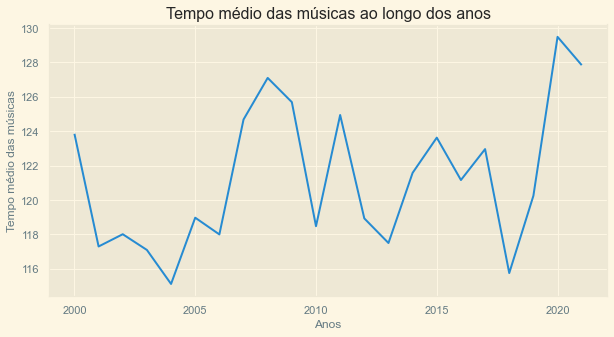

In [224]:
# Analisar o tempo médio das músicas ao longo dos anos

mean_time = df.groupby('playlist_year')['time'].mean()
years = list(range(2000, 2022))

# Criação do gráfico

plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
ax.plot(years, mean_time)
fig.set_size_inches([10, 5])
ax.set_xlabel('Anos')
ax.set_ylabel('Tempo médio das músicas')
ax.set_title('Tempo médio das músicas ao longo dos anos')

plt.show()

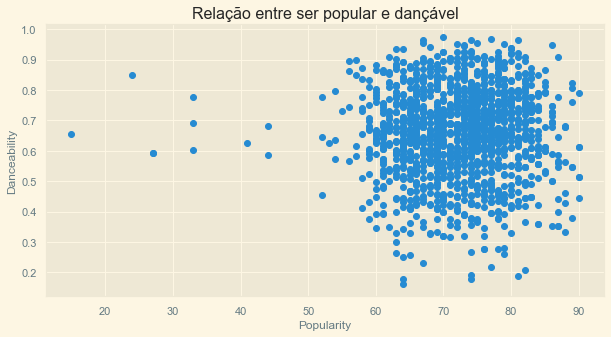

In [229]:
# Analisar a correleção entre as variáveis popularity e danceability

plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
ax.scatter(df['popularity'], df['danceability'])
fig.set_size_inches([10, 5])
ax.set_xlabel('Popularity')
ax.set_ylabel('Danceability')
ax.set_title('Relação entre ser popular e dançável')

plt.show()

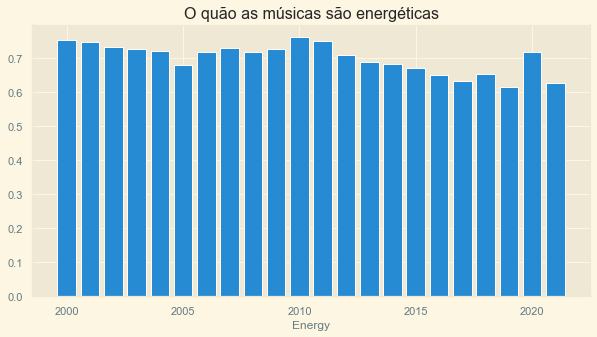

In [230]:
# Analisar a energia (velocidade, volume, barulho etc.) das músicas ao longo dos anos

energy = df.groupby('playlist_year')['energy'].mean()

fig, ax = plt.subplots()
ax.bar(years, energy)
ax.set_xlabel('Energy')
ax.set_title('O quão as músicas são energéticas')
fig.set_size_inches([10, 5])

plt.show()